In [1]:
%matplotlib inline

# Semantic Image Segmentation - DeepLab v3

Our implementation of the DeepLabv3 is entirely based on the paper ["Rethinking Atrous Convolution for Semantic Image Segmentation"](https://arxiv.org/abs/1706.05587). 
This paper tackles with two main problems in semantic image segmentation. 

1) Consecutive pooling operations and convolution striding are necessary for DCNNs to learn increasingly abstract feature representations. However, they cause reduced feature resolution which may impede dense prediction tasks, where detailed spatial information is desired.  Chen et al's proposed approach is to use atrous convolution, a.k.a dilated convolution, to repurpose ImageNet pretrained networks to extract denser feature maps by removing the downsam- pling operations from the last few layers and upsampling the corresponding filter kernels, equivalent to inserting holes between filter weights.

2) The existence of objects at multiple scales is the second important challenge in semantic segmentation. Different DNN architectures have been developed to capture multi-scale context, such as image pyramid, encoder-eecoder, deeper with atrous convolution, spatial pyramid pooling. They chose to implement the [Atrous Spatial Pyramid Pooling (ASPP) method](https://arxiv.org/abs/1606.00915). 

In the end, their proposed model, ‘DeepLabv3’ improves over their previous works [DeepLabv2](https://arxiv.org/abs/1606.00915), [DeepLabv1](https://arxiv.org/abs/1412.7062) and attains performance of 85.7% on the PASCAL VOC 2012 test set without DenseCRF post- processing." 


- If you would like to work on this vm, using our trained model on our datasets skip to section section. 

- If you would like to use this notebook outside this vm, please follow the 1) Setup section first. 

- If you would like to apply the same scripts use your own dataset, refer to section 2) Setup using your own dataset. 

- If you would like to 3) train your own model, refer to the Training section.

- If you would like to perform segmentation on images using our already trained model, fast-forward to the 4) Inference section.

Note: This notebook semantically segments images into these 21 classes:

<img src="notebook_files/color_mask.png">



## 1) Setup on your own machine
- Install latest version of TensorFlow (r1.6) and use Python 3.
- Download and extract [PASCAL VOC training/validation data](http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar)(2GB tar file), specifying the location with the --data_dir.
- Download and extract [augmented segmentation data](https://www.dropbox.com/s/oeu149j8qtbs1x0/SegmentationClassAug.zip?dl=0), specifying the location with --data_dir and --label_data_dir (namely, data_dir/label_data_dir).
- For inference download and extract [the trained model](https://www.dropbox.com/s/gzwb0d6ydpfoxoa/deeplabv3_ver1.tar.gz?dl=0) (76.42% mIoU on the Pascal VOC 2012 validation dataset) to --model_dir.
- For training, download and extract [pre-trained Resnet v2 101 model](http://download.tensorflow.org/models/resnet_v2_101_2017_04_14.tar.gz) specifying the location with --pre_trained_model.


## 2) Setup using your own dataset

- If you would like to apply the same scripts use your own dataset, you should follow the next steps:

    1. Make sure that your segmentation masks are in the same format as the ones in the DeepLab setup (i.e., without a colour map). This means that if your segmentation masks are RGB images, you would need to convert each 3-D RGB vector into a 1-D label. For example, take a look [here](https://gist.github.com/DrSleep/4bce37254c5900545e6b65f6a0858b9c)
    
    2. Create a file with instances of your dataset in the same format as in files [here](https://github.com/sulekahraman/img-seg/tree/master/dataset)
    
    3. Change the flags --data-dir and --data-list accordingly in the `https://gist.github.com/DrSleep/4bce37254c5900545e6b65f6a0858b9c)`; script file that you will be using (e.g., python train.py --data-dir /my/data/dir --data-list /my/data/list);
    
    4. Change the IMG_MEAN vector accordingly in the script file that you will be using;
    
    5. For visualisation purposes, you will also need to change the colour map here;
    
    6. Change the flags num-classes and ignore-label accordingly in the script that you will be using (e.g., python train.py --ignore-label 255 --num-classes 21).
    
    7. If restoring weights from the PASCAL models for your dataset with a different number of classes, you will also need to pass the --not-restore-last flag, which will prevent the last layers of size 21 from being restored.

In [ ]:
setup.sh (in progress)

## 3) Training
For training the model, first convert original data to the TensorFlow TFRecord format.

In [2]:
!python create_pascal_tf_record.py

INFO:tensorflow:Reading from VOC dataset
INFO:tensorflow:On image 0 of 10582
INFO:tensorflow:On image 500 of 10582
INFO:tensorflow:On image 1000 of 10582
INFO:tensorflow:On image 1500 of 10582
INFO:tensorflow:On image 2000 of 10582
INFO:tensorflow:On image 2500 of 10582
INFO:tensorflow:On image 3000 of 10582
INFO:tensorflow:On image 3500 of 10582
INFO:tensorflow:On image 4000 of 10582
INFO:tensorflow:On image 4500 of 10582
INFO:tensorflow:On image 5000 of 10582
INFO:tensorflow:On image 5500 of 10582
INFO:tensorflow:On image 6000 of 10582
INFO:tensorflow:On image 6500 of 10582
INFO:tensorflow:On image 7000 of 10582
INFO:tensorflow:On image 7500 of 10582
INFO:tensorflow:On image 8000 of 10582
INFO:tensorflow:On image 8500 of 10582
INFO:tensorflow:On image 9000 of 10582
INFO:tensorflow:On image 9500 of 10582
INFO:tensorflow:On image 10000 of 10582
INFO:tensorflow:On image 10500 of 10582
INFO:tensorflow:On image 0 of 1449
INFO:tensorflow:On image 500 of 1449
INFO:tensorflow:On image 1000 o

Once you created TFrecord for PASCAL VOC training and validation data, you can start training your model.
train.py uses the trained DeepLabv3 checkpoints in model_dir. 

In [1]:
!python train.py 

INFO:tensorflow:Using config: {'_model_dir': './model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 1000000000.0, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7feaea881ef0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Start training.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
2019-05-02 18:23:25.513093: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 

INFO:tensorflow:global_step/sec: 1.21976
INFO:tensorflow:cross_entropy = 0.235635, learning_rate = 0.0066929, train_mean_iou = 0.535174, train_px_accuracy = 0.849022 (9.232 sec)
INFO:tensorflow:loss = 21.5709, step = 1459 (81.982 sec)
INFO:tensorflow:cross_entropy = 0.250606, learning_rate = 0.00669079, train_mean_iou = 0.538991, train_px_accuracy = 0.850702 (8.091 sec)
INFO:tensorflow:cross_entropy = 0.440164, learning_rate = 0.00668867, train_mean_iou = 0.541549, train_px_accuracy = 0.851777 (8.104 sec)
INFO:tensorflow:cross_entropy = 0.279604, learning_rate = 0.00668656, train_mean_iou = 0.543614, train_px_accuracy = 0.853039 (8.105 sec)
INFO:tensorflow:cross_entropy = 0.296167, learning_rate = 0.00668445, train_mean_iou = 0.545223, train_px_accuracy = 0.853517 (8.067 sec)
INFO:tensorflow:cross_entropy = 0.348325, learning_rate = 0.00668234, train_mean_iou = 0.544891, train_px_accuracy = 0.853884 (8.101 sec)
INFO:tensorflow:cross_entropy = 0.385504, learning_rate = 0.00668023, train

INFO:tensorflow:cross_entropy = 0.543247, learning_rate = 0.00657461, train_mean_iou = 0.542974, train_px_accuracy = 0.850582 (8.090 sec)
INFO:tensorflow:cross_entropy = 0.524376, learning_rate = 0.00657249, train_mean_iou = 0.541732, train_px_accuracy = 0.850517 (8.078 sec)
INFO:tensorflow:cross_entropy = 0.558765, learning_rate = 0.00657038, train_mean_iou = 0.541467, train_px_accuracy = 0.849994 (8.115 sec)
INFO:tensorflow:cross_entropy = 0.490833, learning_rate = 0.00656826, train_mean_iou = 0.541771, train_px_accuracy = 0.849796 (8.101 sec)
INFO:tensorflow:global_step/sec: 1.21878
INFO:tensorflow:cross_entropy = 0.178419, learning_rate = 0.00656615, train_mean_iou = 0.542493, train_px_accuracy = 0.850498 (9.157 sec)
INFO:tensorflow:loss = 21.1833, step = 2059 (82.048 sec)
INFO:tensorflow:cross_entropy = 0.622404, learning_rate = 0.00656404, train_mean_iou = 0.542143, train_px_accuracy = 0.850365 (8.096 sec)
INFO:tensorflow:cross_entropy = 0.511763, learning_rate = 0.00656192, trai

## 4) Inference
You can apply semantic segmentation to your images by running the next cell. DATA_DIR is the path to the directory that contains the images you would like to run segmentation on.
INFER_DATA_LIST is a txt file with filenames of images to be segmented. An example of the content of file sample_images_list.txt can be found [here](https://github.com/sulekahraman/img-seg/blob/master/dataset/sample_images_list.txt). You can change the images you segment by editing the sample_images_list.txt file or creating a new txt file that includes the paths to the input images and use the --infer_data_list flag.


After running inference.py, you can find your segmented images in the directory data/inference_output/ 

Explanation of color masks in segmented images:

<img src="notebook_files/color_mask.png">

In [2]:
!python inference.py #--infer_data_list INFER_DATA_LIST --data_dir DATA_DIR

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc77676c128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
2019-05-02 18:49:17.407398: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2019-05-02 18:49:17.789405:

You can visualize the images produced by running the script in the next cell. 

original image:


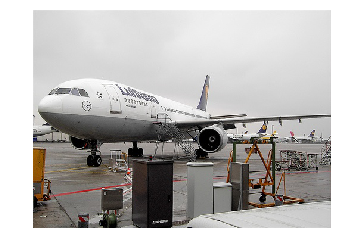

generating: ./data/inference_output/2007_000033_mask.png


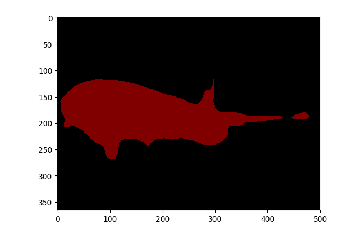

original image:


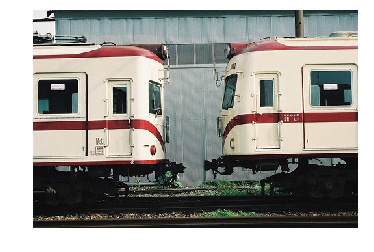

generating: ./data/inference_output/2007_000042_mask.png


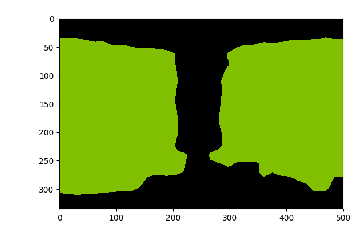

original image:


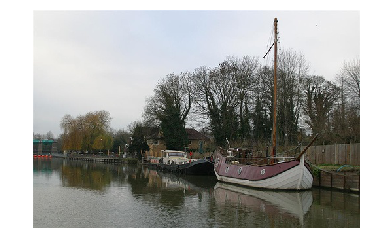

generating: ./data/inference_output/2007_000061_mask.png


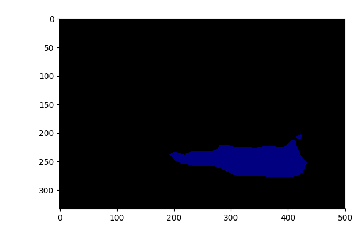

original image:


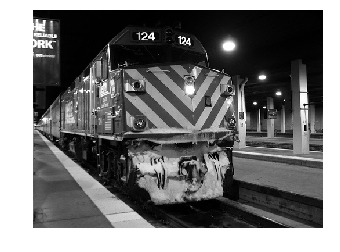

generating: ./data/inference_output/2007_000123_mask.png


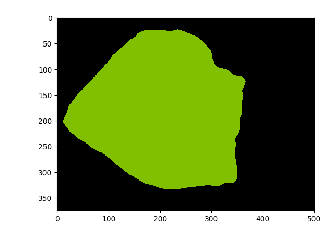

original image:


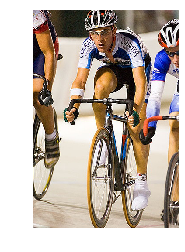

generating: ./data/inference_output/2007_000129_mask.png


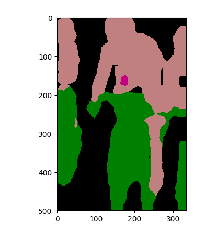

original image:


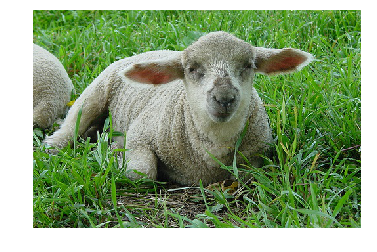

generating: ./data/inference_output/2007_000175_mask.png


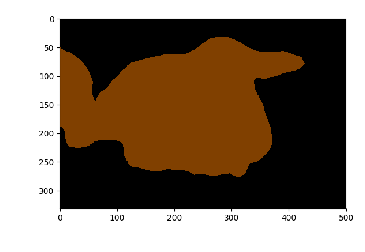

original image:


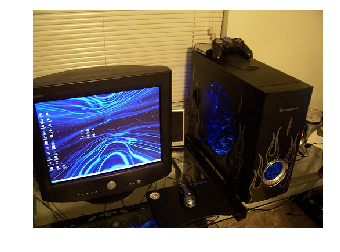

generating: ./data/inference_output/2007_000187_mask.png


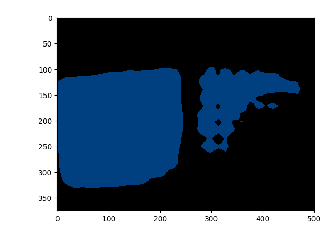

original image:


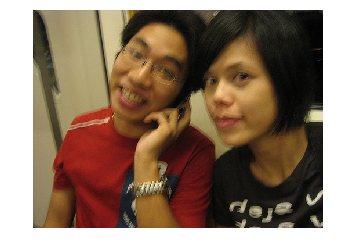

generating: ./data/inference_output/2007_000323_mask.png


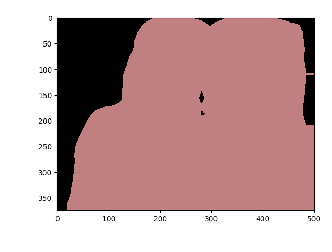

In [6]:
import os
import sys
from utils import dataset_util
from PIL import Image
import matplotlib.pyplot as plt
import imageio

data_dir = 'data/VOCdevkit/VOC2012/JPEGImages' 
infer_data_list = './dataset/sample_images_list.txt'
examples = dataset_util.read_examples_list(infer_data_list)
image_files = [os.path.join(data_dir, filename) for filename in examples]
output_dir = './data/inference_output'
for image_path in image_files:
    image_basename = os.path.splitext(os.path.basename(image_path))[0]
    output_filename = image_basename + '_mask.png'
    path_to_output = os.path.join(output_dir, output_filename)
    print("original image:")
    plt.figure(1)
    plt.axis('off')
    orig_img = imageio.imread(image_path)
    plt.imshow(orig_img)
    plt.show(block=True)
    
    plt.figure(2)
    print("generating:", path_to_output)
    mask = imageio.imread(path_to_output)
    plt.axis('off')
    plt.imshow(mask)
    plt.show(block=True)
#     plt.savefig(path_to_output, bbox_inches='tight')





If you have questions or feedback, please email sulek@mit.edu